# Ford GoBike System Data Exploration 

### by Steven Hoang

## Table of Contents

<ul>
<li><a href="#Preliminary Wrangling">Preliminary Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#univariate">Univariate Exploration</a></li>
<li><a href="#bivariate">Bivariate Exploration</a></li>
<li><a href="#multivariate">Multivariate Exploration</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction
This dataset unveils details about individual bike rides, offering valuable insights into user behavior, trip patterns, and the overall dynamics of the Ford GoBike System in 2019. Through a systematic approach, this exploration aims to uncover interesting correlations, highlight standout trends, and draw conclusions of what the Ford GoBike System's dataset has to tell us. 

<a id='Preliminary Wrangling'></a>
## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Accessing the Data

In [2]:
# load the data and print out a few lines
bike_df = pd.read_csv('201902-fordgobike-tripdata.csv')
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# display dimensions of dataset
print("The dataframe has", bike_df.shape[0], "rows and", bike_df.shape[1], "columns.")

The dataframe has 183412 rows and 16 columns.


In [4]:
# provide overview of dataset
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# check for missing values
bike_df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
# check for duplicates
sum(bike_df.duplicated())

0

In [7]:
# Check unique values in the 'member_gender' column
print(bike_df['member_gender'].unique())

# Check unique values in the 'user_type' column
print(bike_df['user_type'].unique())

# Check unique values in the 'bike_share_for_all_trip' column
print(bike_df['bike_share_for_all_trip'].unique())

['Male' nan 'Other' 'Female']
['Customer' 'Subscriber']
['No' 'Yes']


### Understanding the Dataset's Structure
- The dataset contains 183,412 bike rides, each described by 16 features. 
- The majority of variables in the dataset are numeric.
- Some variables, like `start_time` and `end_time`, have incorrect data types and should be converted to datetime.
- Certain variables, including `start_station_id`, `start_station_name`, `end_station_id`, `end_station_name`, `member_birth_year`, and `member_gender`, have missing values.

### Areas of Interest in the Dataset
- Explore peak hours of the day, popular days of the week, and months with the highest bike trip frequency.
- Identify features strongly correlated with average bike trip duration, such as age, gender, user type, and other relevant variables.

### Key Features for Investigating Areas of Interest
- Utilizing features extracted from `start_time`: `start_month`, `start_day`, and `start_hour`.
- Employing corresponding end-time features: `end_month`, `end_day`, and `end_hour`.
- Considering `duration_sec`, `age`, `member_gender`, and `user_type` as potential predictors for average bike trip duration.

<a id='cleaning'></a>
## Data Cleaning

In [8]:
# create a copy of the dataframe
bike_clean = bike_df.copy()

In [9]:
# drop columns that are not needed
bike_clean.drop(['start_station_id', 'start_station_latitude', 'start_station_longitude', 
                   'end_station_id', 'end_station_latitude', 'end_station_longitude', 'bike_id'], axis=1, inplace=True)

# print the first few rows of the cleaned dataframe
bike_clean.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,The Embarcadero at Steuart St,Berry St at 4th St,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974.0,Male,Yes


In [11]:
# drop rows with missing values
bike_clean = bike_clean.dropna()

# check for missing values
bike_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_name         0
end_station_name           0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [12]:
# convert start_time and end_time to datetime
bike_clean.start_time = pd.to_datetime(bike_clean.start_time)
bike_clean.end_time = pd.to_datetime(bike_clean.end_time)

# check data types
print(bike_clean[['start_time', 'end_time']].dtypes)

start_time    datetime64[ns]
end_time      datetime64[ns]
dtype: object


In [13]:
# print unique years in start_time column
print(bike_clean.start_time.dt.year.unique())

# print unique years in end_time column
print(bike_clean.end_time.dt.year.unique())

[2019]
[2019]


In [14]:
# create a new column for trip duration in minutes
bike_clean['duration_minute'] = bike_clean['duration_sec'] / 60

In [15]:
# extract month, weekday, and hour from start_time and end_time
bike_clean['start_month'] = bike_clean.start_time.dt.month_name()
bike_clean['start_day'] = bike_clean.start_time.dt.day_name()
bike_clean['start_hour'] = bike_clean.start_time.dt.hour

bike_clean['end_month'] = bike_clean.end_time.dt.month_name()
bike_clean['end_day'] = bike_clean.end_time.dt.day_name()
bike_clean['end_hour'] = bike_clean.end_time.dt.hour

In [16]:
# calculate age and create new column
bike_clean['age'] = (2019 - bike_clean.member_birth_year).astype(int)

In [17]:
# convert selected columns to categorical data type
cols = ['member_gender', 'user_type', 'bike_share_for_all_trip']
bike_clean[cols] = bike_clean[cols].astype('category')

In [18]:
# display the first five rows of the cleaned dataframe
bike_clean.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute,start_month,start_day,start_hour,end_month,end_day,end_hour,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984.0,Male,No,869.750000,February,Thursday,17,March,Friday,8,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male,No,1030.900000,February,Thursday,12,March,Friday,5,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,1989.0,Other,No,608.166667,February,Thursday,17,March,Friday,4,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974.0,Male,Yes,26.416667,February,Thursday,23,March,Friday,0,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,1959.0,Male,No,29.883333,February,Thursday,23,March,Friday,0,60


In [19]:
# display information about the cleaned dataframe
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_name       174952 non-null  object        
 4   end_station_name         174952 non-null  object        
 5   user_type                174952 non-null  category      
 6   member_birth_year        174952 non-null  float64       
 7   member_gender            174952 non-null  category      
 8   bike_share_for_all_trip  174952 non-null  category      
 9   duration_minute          174952 non-null  float64       
 10  start_month              174952 non-null  object        
 11  start_day                174952 non-null  object        
 12  start_hour      

In [21]:
print("The dataframe now has", bike_clean.shape[0], "rows and", bike_clean.shape[1], "columns.")

The dataframe now has 174952 rows and 17 columns.


In [20]:
# display descriptive statistics for cleaned dataframe
bike_clean.describe()

,duration_sec,member_birth_year,duration_minute,start_hour,end_hour,age
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,1984.803135,11.733379,13.456165,13.609533,34.196865
std,1642.204905,10.118731,27.370082,4.734282,4.748029,10.118731
min,61.000000,1878.000000,1.016667,0.000000,0.000000,18.000000
25%,323.000000,1980.000000,5.383333,9.000000,9.000000,27.000000
50%,510.000000,1987.000000,8.500000,14.000000,14.000000,32.000000
75%,789.000000,1992.000000,13.150000,17.000000,18.000000,39.000000
max,84548.000000,2001.000000,1409.133333,23.000000,23.000000,141.000000


In [22]:
# export cleaned dataframe to a csv
bike_clean.to_csv('clean-fordgobike-tripdata.csv', index=False)

<a id='univariate'></a>
## Univariate Exploration

### 1. What is the distribution of trip durations in the dataset?

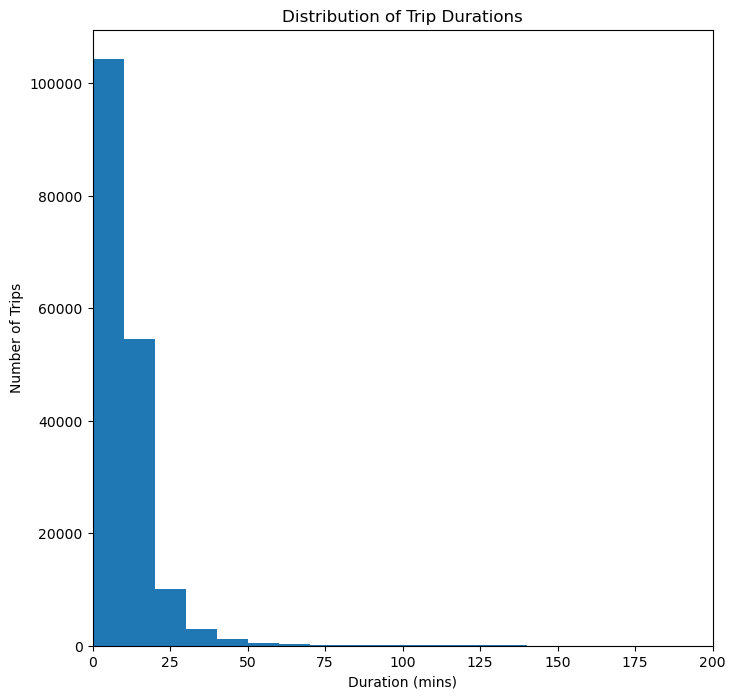

In [24]:
# Set bin size and range
bin_size = 10
bin_range = np.arange(0, bike_clean.duration_minute.max()+bin_size, bin_size)
plt.figure(figsize=[8, 8])
plt.hist(data=bike_clean, x='duration_minute', bins=bin_range)

# create histogram of trip duration distribution
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (mins)')
plt.ylabel('Number of Trips')
plt.xlim(0, 200)
plt.show()

> Since the histogram of trip durations is heavily skewed to the right, we will apply a log scale to transform the data and better visualize the distribution.

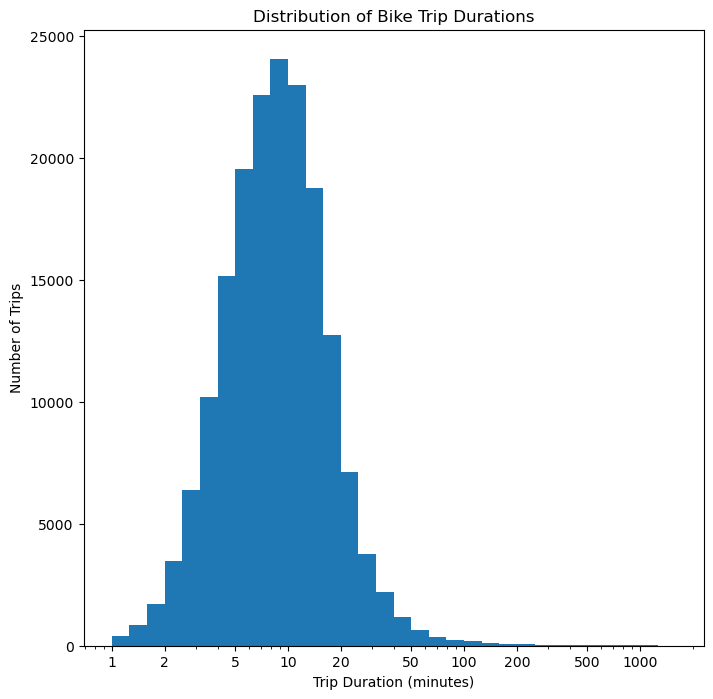

In [25]:
# plotting the distribution of trip durations on a logarithmic scale
bins = 10 ** np.arange(0, np.log10(bike_clean['duration_minute'].max())+0.1, 0.1)
plt.figure(figsize=[8, 8])
plt.hist(data=bike_clean, x='duration_minute', bins=bins)

# customize chart and display the plot
tick_locs = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Number of Trips')
plt.title('Distribution of Bike Trip Durations')
plt.xscale('log')
plt.xticks(tick_locs, tick_locs)
plt.show()

> When plotted on a log scale, the distribution of trip durations appears to be roughly bimodal, with the highest peak between 8 minutes and 10 minutes. The majority of trips have durations between 8 and 15 minutes.

### 2. What is the distribution of ages among the riders?

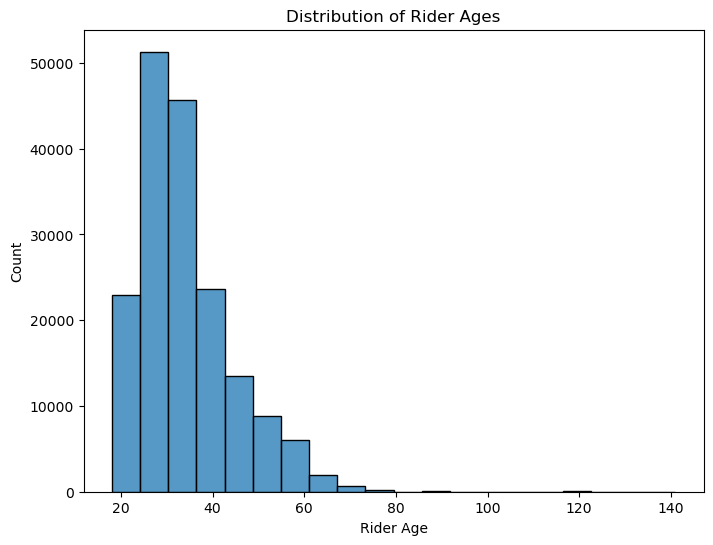

In [29]:
# create a histogram of rider ages
plt.figure(figsize=(8,6))
sns.histplot(bike_clean.age, bins=20, kde=False)
plt.xlabel('Rider Age')
plt.ylabel('Count')
plt.title('Distribution of Rider Ages')
plt.show()

> The age distribution of bike service users is right-skewed, with the majority of users between the ages of 20 and 45.

### 3. What is the distribution of genders among the riders?

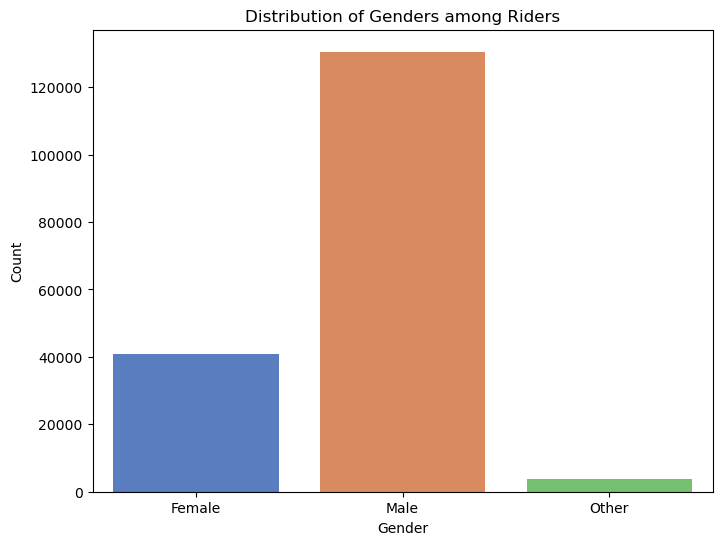

In [34]:
# create a bar plot of gender counts
plt.figure(figsize=(8,6))
sns.countplot(data=bike_clean, x='member_gender', palette='muted')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Genders among Riders')
plt.show()

> Male users of the bike-sharing service significantly outnumber female and other gender users, with over 120,000 male riders in 2019.

### 4. What is the distribution of user types among the riders?

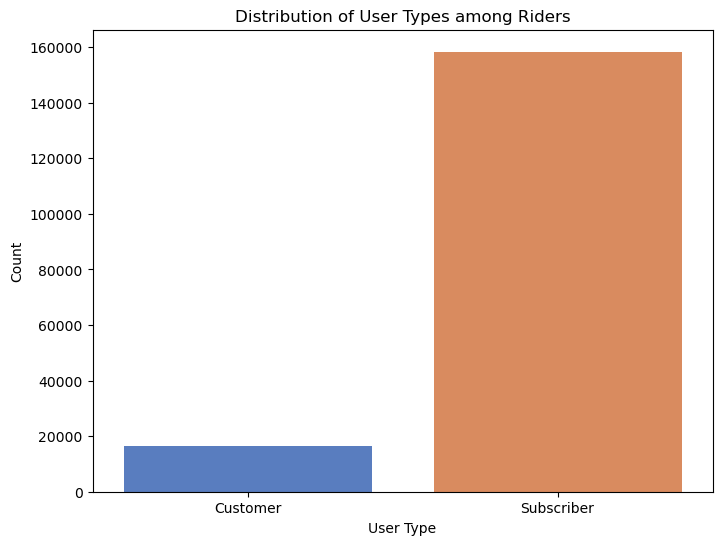

In [36]:
# create a bar plot of user type counts
plt.figure(figsize=(8,6))
sns.countplot(data=bike_clean, x='user_type', palette='muted')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.title('Distribution of User Types among Riders')
plt.show()

> The majority of bike-sharing service users in the dataset are subscribers. This suggests that the service is used more frequently by regular riders who may benefit from subscription perks.

### 5. What is the most common hour of the day for bike trips?

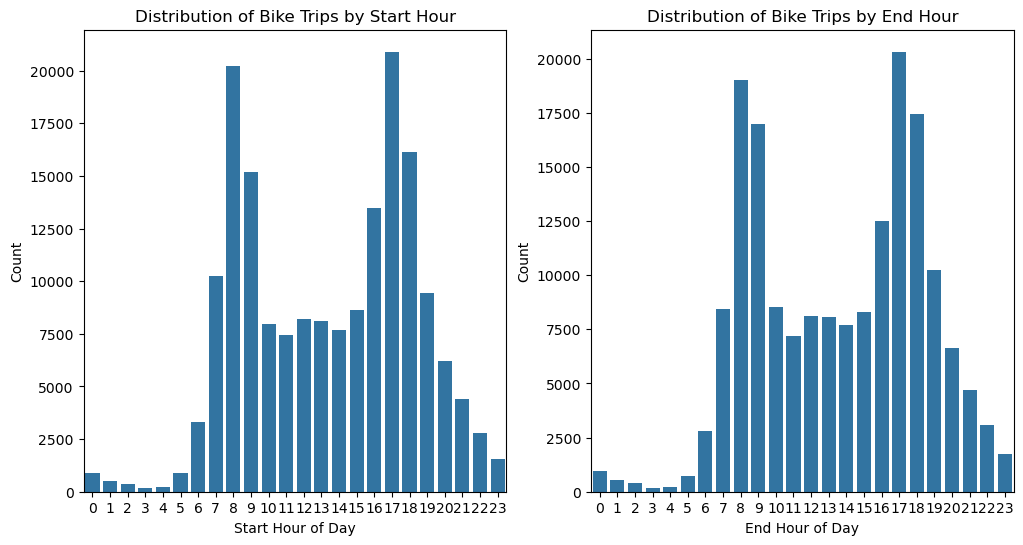

In [37]:
# create two countplots side by side to compare start hour vs. end hour distributions
fig, ax = plt.subplots(1, 2, figsize=[12, 6])

# set the base color for both plots
base_color = sb.color_palette()[0]

# plot start hour counts on the left subplot
sb.countplot(data=bike_clean, x='start_hour', color=base_color, ax=ax[0])
ax[0].set_xlabel('Start Hour of Day')
ax[0].set_ylabel('Count')
ax[0].set_title('Distribution of Bike Trips by Start Hour')

# plot end hour counts on the right subplot
sb.countplot(data=bike_clean, x='end_hour', color=base_color, ax=ax[1])
ax[1].set_xlabel('End Hour of Day')
ax[1].set_ylabel('Count')
ax[1].set_title('Distribution of Bike Trips by End Hour')

plt.show()

> Most people start their bike rides at 8:00 AM, and the most common time to finish is 5:00 PM. This hints that a lot of folks use bikes for going to and from work or school. There's a time in the middle of the day when fewer bike trips happen, maybe because people are taking lunch breaks or doing errands.

### 6. What is the most common month for bike trips?

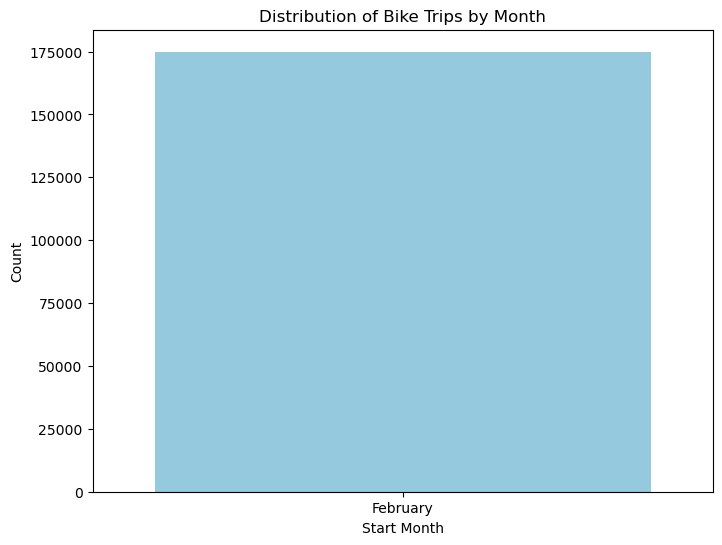

In [41]:
# create a bar plot of trip counts by month
plt.figure(figsize=(8,6))
sb.countplot(data=bike_clean, x='start_month', color='skyblue')
plt.xlabel('Start Month')
plt.ylabel('Count')
plt.title('Distribution of Bike Trips by Month')
plt.show()

> Based on the bar plot of bike trip counts by month, it appears that February was the month with the highest number of trips both at the start and end of the ride. 

### 7. What is the most common day of the week for bike trips?

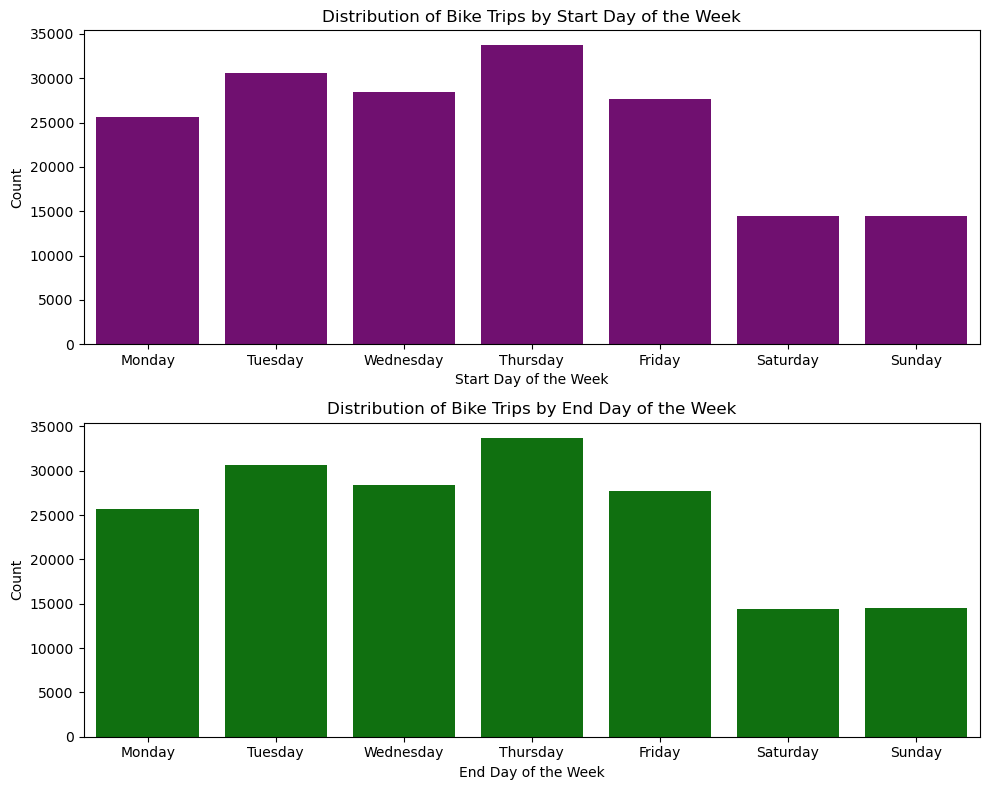

In [42]:
# define the order of days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# create subplots for start and end day distributions
fig, ax = plt.subplots(2, figsize=[10,8])

# plot distributions by start day
sb.countplot(data=bike_clean, x='start_day', color='purple', ax=ax[0], order=day_order)
ax[0].set_xlabel('Start Day of the Week')
ax[0].set_ylabel('Count')
ax[0].set_title('Distribution of Bike Trips by Start Day of the Week')

# plot distributions by end day
sb.countplot(data=bike_clean, x='end_day', color='green', ax=ax[1], order=day_order)
ax[1].set_xlabel('End Day of the Week')
ax[1].set_ylabel('Count')
ax[1].set_title('Distribution of Bike Trips by End Day of the Week')

# display plot
plt.tight_layout()
plt.show()

> Thursday is the most common day for both the start and end of bike trips, followed closely by Tuesday. On the other hand, the weekends (Saturday and Sunday) have the lowest number of bike trips compared to weekdays.

### Exploring and Analyzing the Distribution of Key Variables

- The distribution of bike trip durations is skewed to the right, but appears bimodal under a log transformation with the highest peak between 8 and 15 minutes.


- The age range of most bike service users falls between 20 and 45 years old.


- Male users make up the majority of the bike service users, and most users are subscriber.


- The most popular times for bike trips are 8-9am and 5-6pm on weekdays.


- Bike trips are most frequently taken on Thursdays, while the weekends (Saturday and Sunday) see the fewest trips.


### Identifying Unusual Patterns and Data Operations for Tidying and Adjustment

- Converted the start_time and end_time columns to datetime format to enable easy extraction of additional time-related features.


- Extracted month, weekday, and hour information from the start_time and end_time columns to investigate trends in bike usage by time of day and day of the week.


- Calculated the age of each user based on their birth year to investigate the age distribution of bike service users.


- Converted several categorical columns (member_gender, user_type, and bike_share_for_all_trip) to the appropriate data type to facilitate further analysis.


- Dropped unnecessary columns (such as start and end station IDs and bike IDs) that were not relevant to the investigation.

<a id='bivariate'></a>
## Bivariate Exploration

### 1. Does the length of bike trips vary depending on the age of the user?

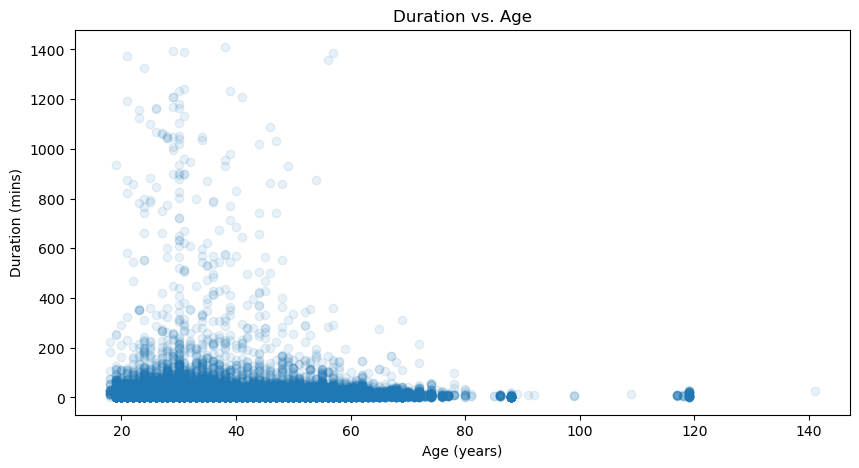

In [43]:
plt.figure(figsize=[10, 5])
plt.scatter(data=bike_clean, x='age', y='duration_minute', alpha=1/10)
plt.xlabel('Age (years)')
plt.ylabel('Duration (mins)')
plt.title('Duration vs. Age')
plt.show()

> There is no apparent linear relationship between user age and trip duration. However, we can observe that the highest trip durations were taken by riders aged between 20 to 60 years old. The majority of the trip durations fall within the range of 0 to 200 minutes.

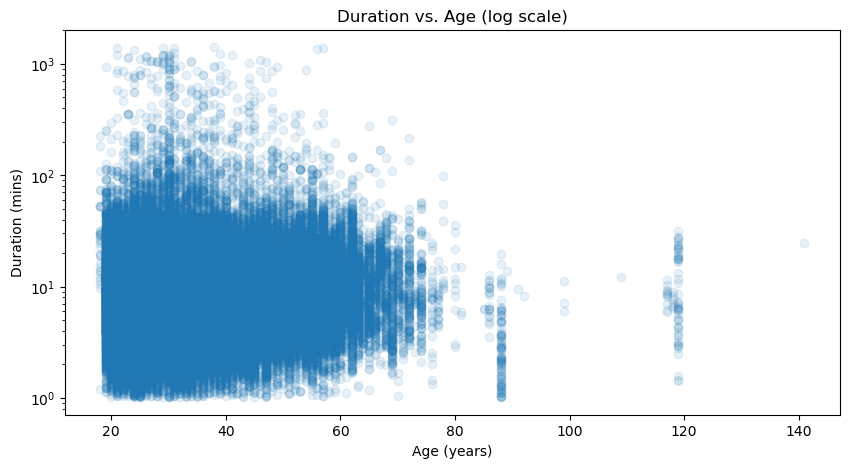

In [44]:
plt.figure(figsize=[10, 5])
plt.scatter(data=bike_clean, x='age', y='duration_minute', alpha=1/10)
plt.xlabel('Age (years)')
plt.ylabel('Duration (mins)')
plt.title('Duration vs. Age (log scale)')
plt.yscale('log')
plt.show()

> After applying a logarithmic transformation to the trip duration variable, there still appears to be no clear linear correlation between age and trip duration. However, the scatter plot shows a more even distribution of data compared to the previous plot.

### 2. Are subscriber users more likely to take shorter or longer bike trips than casual users?

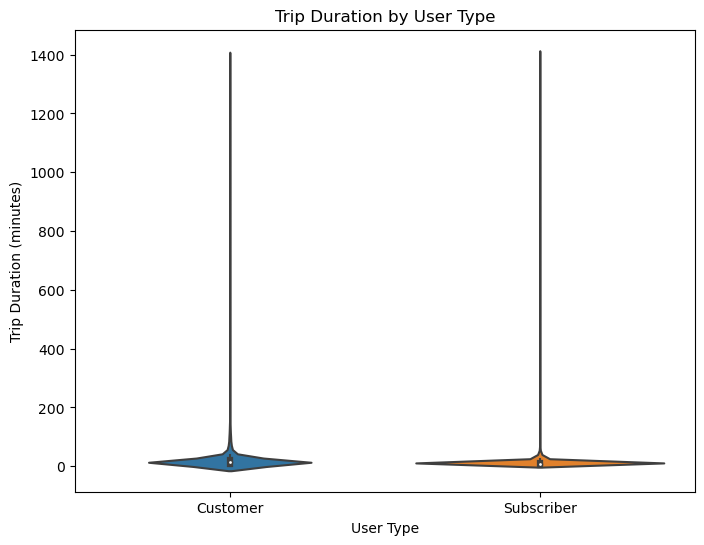

In [47]:
plt.figure(figsize=[8, 6])
sb.violinplot(data=bike_clean, x='user_type', y='duration_minute')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (minutes)')
plt.title('Trip Duration by User Type')
plt.show()

> Casual users are actually more likely to take longer bike trips than subscriber users. The violin for casual users is wider than the violin for subscriber users, indicating that casual users have a wider range of trip durations.

### 3. Is there a correlation between pairs of variables in the dataset?

In [48]:
# list of numeric variables
numeric_vars = ['age', 'start_hour', 'end_hour', 'duration_minute']

# list of categorical variables
categoric_vars = ['member_gender', 'start_day', 'end_day', 'user_type']

C:\Users\Steven Hoang\AppData\Local\Temp\ipykernel_11788\2408846208.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(bike_clean.corr(), annot = True, fmt = '.2f',


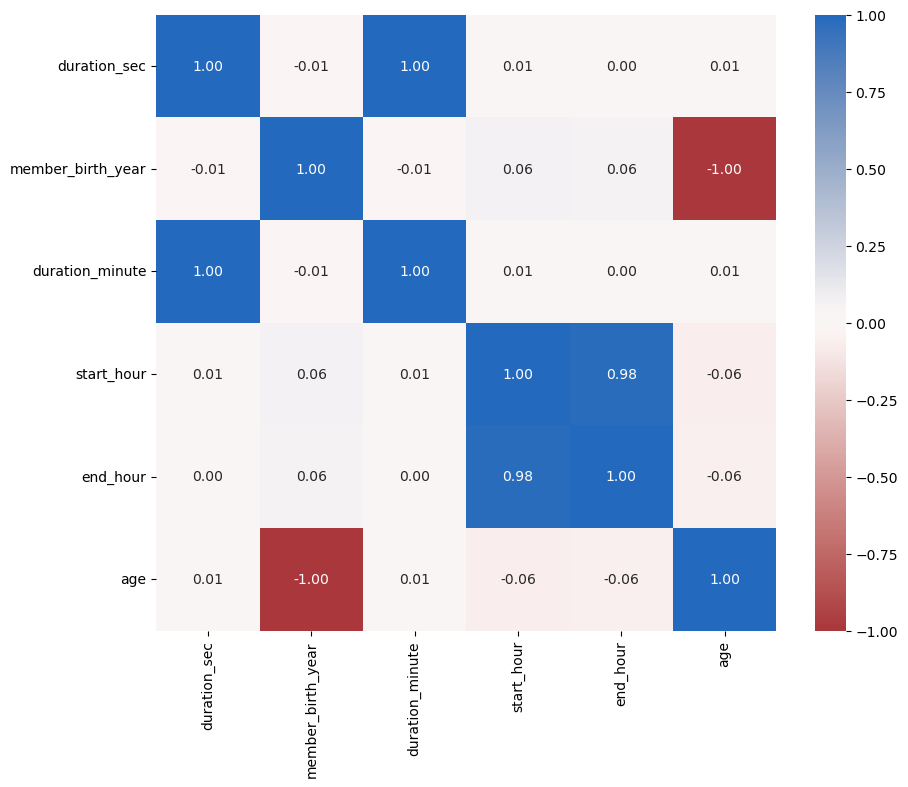

In [49]:
plt.figure(figsize = [10, 8])
sb.heatmap(bike_clean.corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0)
plt.show()

Text(0.5, 0.98, 'Pairwise Relationships for Numeric Variables')

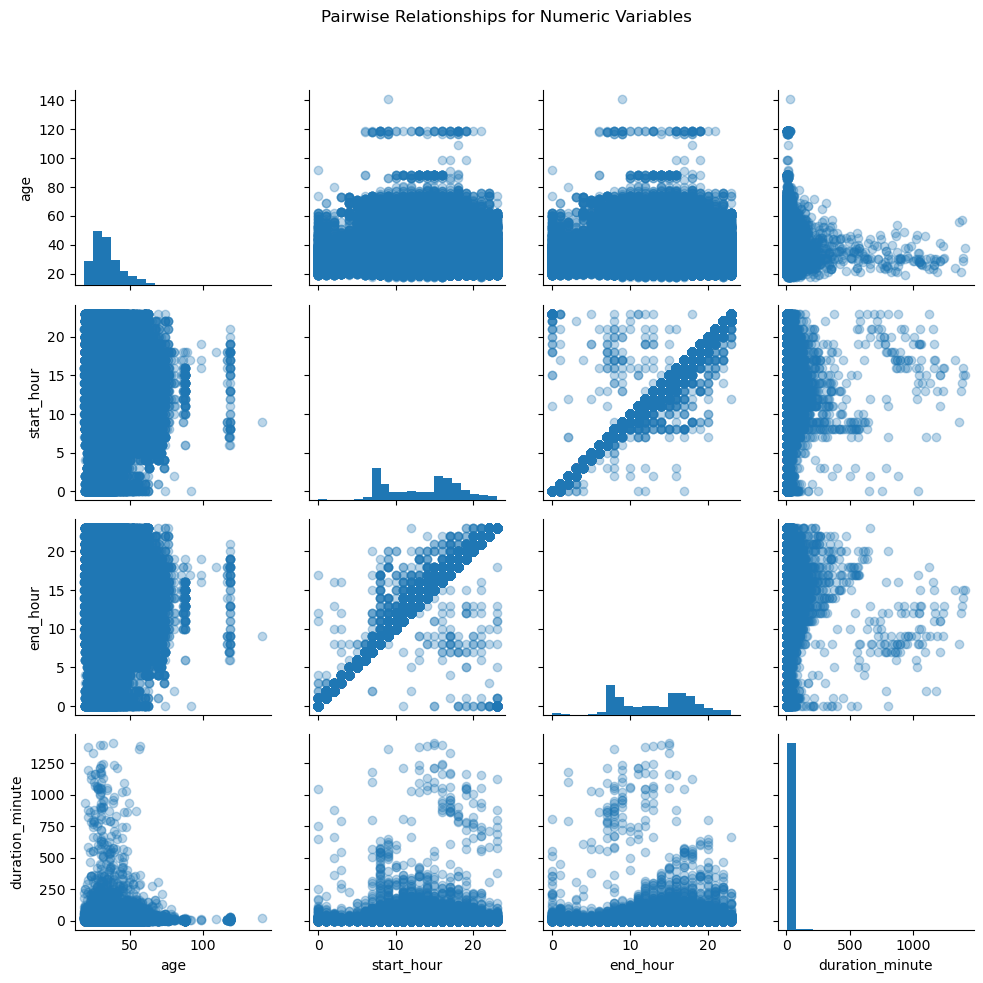

In [50]:
g = sb.PairGrid(data=bike_clean, vars=numeric_vars)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter, alpha=0.3)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Pairwise Relationships for Numeric Variables')

> Upon analyzing the data, we can observe a positive correlation between the start_hour and end_hour variables. However, there appears to be no clear linear correlation between the numeric variables. Despite this, we still decided to investigate the relationship between age and duration_min. Through our exploration, we noticed a trend that indicates the duration of the bike trip tends to decrease as the age of the user increases.

### Observations on Relationships and Variations Among Dataset Features

- There was no linear correlation between age and trip duration, but there was a pattern where trip duration tended to decrease as the age of the user increased.

- User type and trip duration: Casual users tend to take longer bike trips than subscriber users.

- There was a positive correlation between start hour and end hour, indicating that the time of day when a trip starts is usually similar to the time of day when the trip ends.


### Observations Among Other Features in the Dataset

- Higher number of male users compared to female and other gender users.

- Peak trip days: Thursdays > Tuesdays; Fewer trips on weekends (Saturday and Sunday).

- Dominance of subscriber users; they tend to take shorter trips compared to casual users.

<a id='multivariate'></a>
## Multivariate Exploration

### 1. What is the daily average trip duration for each user type?

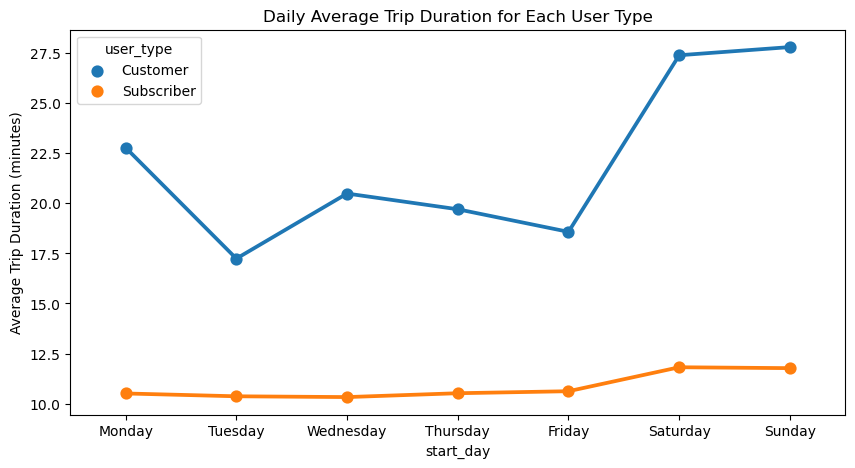

In [51]:
# define the order of days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# calculate the average trip duration for each user type
daily_avg_duration = bike_clean.groupby(['user_type', 'start_day']).duration_minute.mean().reset_index()

# convert start_day to categorical variable with day_order as the order
daily_avg_duration['start_day'] = pd.Categorical(daily_avg_duration['start_day'], categories=day_order, ordered=True)

# create a point plot with colors based on user type
plt.figure(figsize=[10, 5])
sns.pointplot(data=daily_avg_duration, x='start_day', y='duration_minute', hue='user_type', markers='o')
plt.title("Daily Average Trip Duration for Each User Type")
plt.ylabel('Average Trip Duration (minutes)');

> On average, the trip durations for customers were longer than those of subscribers on every day of the week.

### 2. What is the average trip duration for each user type at different times of the day?

Text(0, 0.5, 'Average Trip Duration (minutes)')

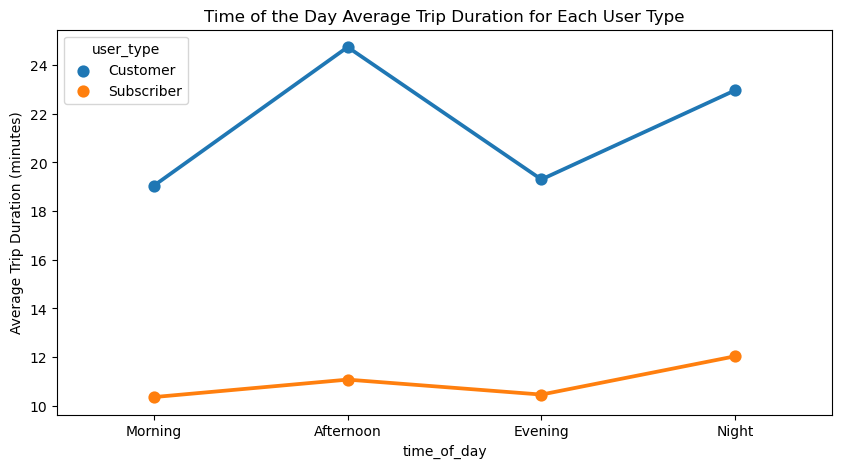

In [52]:
# create a function to categorize hours of the day
def categorize_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

# apply the function to the 'start_hour' column and create a new column called 'time_of_day'
bike_clean['time_of_day'] = bike_clean['start_hour'].apply(categorize_time_of_day)

# define the order of categories for time_of_day
time_of_day_order = ['Morning', 'Afternoon', 'Evening', 'Night']

# calculate the time of day average trip duration for each user type
user_daytime_avg_min = bike_clean.groupby(['user_type', 'time_of_day']).duration_minute.mean().reset_index()

# create a point plot with colors based on user type and ordered categories for time_of_day
plt.figure(figsize=[10, 5])
sns.pointplot(data=user_daytime_avg_min, x='time_of_day', y='duration_minute', hue='user_type', order=time_of_day_order, markers='o')
plt.title("Time of the Day Average Trip Duration for Each User Type")
plt.ylabel('Average Trip Duration (minutes)')

> The plots reveal relatively stable trip durations for both user types during morning and nighttime, while a significant increase in average trip duration for customers is observed during the afternoon. This can be attributed to customers primarily initiating their trips in the afternoon.

### Observations on Relationships Enhancing the Understanding of Key Features
The analysis shows that customers generally have longer trip durations compared to subscribers. This pattern holds true across all days of the week and different times of the day.

Features that strengthen each other include user type, days of the week, and time of day, providing a more extensive understanding of trip duration patterns. Examining these features together reveals how user behavior varies. For example, analysis shows customers have longer afternoon trips, suggesting leisure use, while subscribers may use the service primarily for commuting, resulting in shorter, consistent trip durations.


### Interesting Patterns Among Features
Customers consistently took longer trips than subscribers throughout the week and various times of the day. Notably, afternoons saw a significant rise in average trip duration for customers, suggesting a preference for leisure activities during this period.

<a id='conclusions'></a>
## Conclusions

- The bike-sharing service is mostly used by male riders, with over 120,000 male users in 2019. Female and other gender users are significantly fewer in number.


- Most bike service users are between the ages of 20 and 45, with a skewed distribution towards younger ages.


- The majority of bike trips are taken on weekdays, with Thursdays being the most popular day and weekends being the least popular.


- The most common hours of the day for bike trips are 8-9am and 5-6pm.


- The majority of bike service users are subscribers, and subscribers are more likely to take shorter bike trips than customers.


- There is no linear correlation between age and trip duration, but there is a pattern between age and duration, with the duration of the trip decreasing as the age of the user of the bike service increases.


- On average, the trip durations for customers were longer than those of subscribers on every day of the week.